In [5]:
import matplotlib.pyplot as plt

In [2]:
# H1: even numbers
# H2: odd numbers
# H3: square numbers
# H4: prime numbers
# H5: multiples of 5
# H6: multiples of 10
# H7: all numbers

H1 = []
H2 = []
H3 = []
H4 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
H5 = []
H6 = []
H7 = list(range(101))
all_datasets = [H1, H2, H3, H4, H5, H6, H7]

for i in range(100):
    if i%2 == 0:
        H1.append(i)
    if i%2 != 0: 
        H2.append(i)
    if i**(0.5) == int(i**0.5):
        H3.append(i)
    if i%5 == 0:
        H5.append(i)
    if i%10 == 0:
        H6.append(i)

In [9]:
#Question 1

def likelihood(x, h):
    SPL = [] #size principle likelihood
    count = 0
    for i in range(0, len(x)):
        if x[i] in h:
            count += 1
        else:
            b = 0
    if count == len(x):
        b = (1/len(h))**count
    SPL.append(b)
    return SPL[0]

Data points in the hypothesis have a probability of 1/len(h), where h is the hypothesis. And each hypothesis with no data points has a likelihood of 0.

Likelihood for the hypotheses:

H1: 1/50
H2: 1/50
H3: 1/10
H4: 1/25
H5: 1/20
H6: 1/10
H7: 1/100

In [7]:
#Question 2

a = []
b = [50]
c = [53]
d = [50, 53]
e = [16]
f = [10, 20]
g = [2, 4, 8]
h = [2, 4, 6, 8]

def predictability(D, H, h):
    w = []
    z = likelihood(D, h)*(1/len(H))
    for i in H:
        if (likelihood(D, i)*(1/len(H))) != z: 
            w.append(likelihood(D, i)*(1/len(H)))
    pp = (z)/(z + sum(w)) #predictive probability
    return pp

In [5]:
def posterior(dataset):
    hypotheses = [H1, H2, H3, H4, H5, H6, H7]
    x, y = [], []
    for i in range(101):
        x.append(i)
        j = []
        for h in hypotheses:
            if i in h:
                value = 1
            else:
                value = 0
            pp = predictability(dataset, hypotheses, h)
            j.append(value*pp)
        y.append(sum(j))
    plt.xlabel('Number')
    plt.ylabel('Predictive Probability')
    plt.xlim(0,100)
    plt.bar(x,y)
    plt.show()

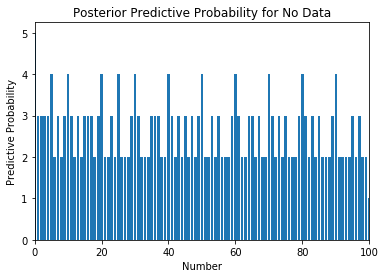

In [6]:
plt.title('Posterior Predictive Probability for No Data')
data = a
posterior(data)

No, it does not capture my intuitions of the "right" answer because the graph is not empty. I would imagine an empty graph considering there is no data.

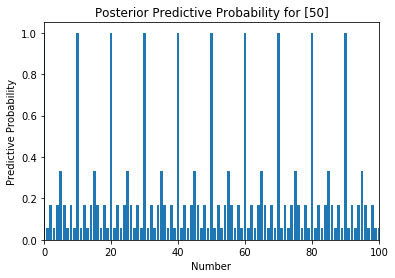

In [7]:
plt.title('Posterior Predictive Probability for [50]')
data = b
posterior(data)

Yes, it does captures my intuitions because 50 is an even number, multiple of 5, and multiple of 10. The graph clearly shows components that are either any given number (H7 (all numbers) which will be implied in the following graphs), an even number, multiple of 5, multiple of 50, or possess all characteristics. When they possess all requirements, the output is 1.

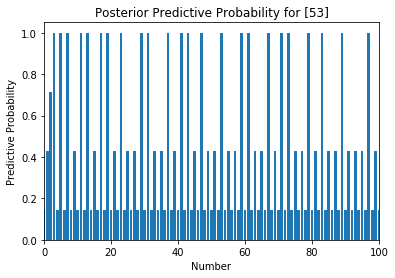

In [8]:
plt.title('Posterior Predictive Probability for [53]')
data = c
posterior(data)

Yes, it does captures my intuition because 53 is an odd number and prime number, and graph shows accordingly. And when all components are present, the output is 1.

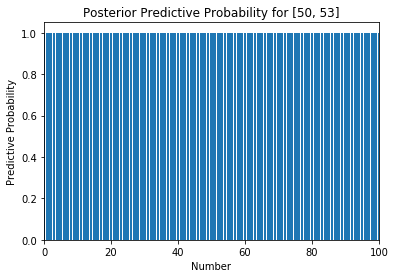

In [9]:
plt.title('Posterior Predictive Probability for [50, 53]')
data = d
posterior(data)

This graph does not quite meet my intuitions because it appears to lack taking into account square numbers for 50 & 53. However, this may be because 50 & 53 cover all other characteristics such as even and odd numbers, prime numbers, multiples of 5 and 10, so perhaps square numbers are covered by the other requirements, which would make every output 1.

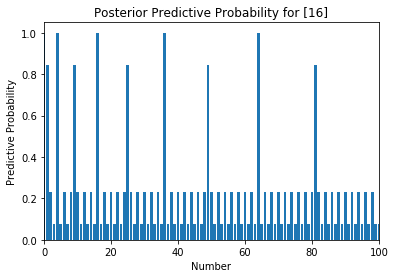

In [10]:
plt.title('Posterior Predictive Probability for [16]')
data = e
posterior(data)

Yes, it does meet my intutions becausee 16 is an even number and a square number, and the graph shows accordingly. And when all the components are present, the output is 1.

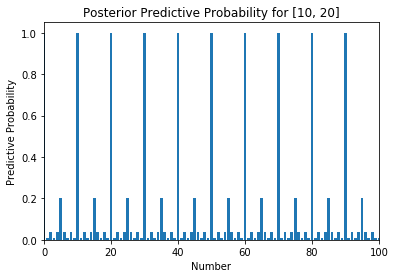

In [11]:
plt.title('Posterior Predictive Probability for [10, 20]')
data = f
posterior(data)

Yes, it does meet my intuitions because 10 and 20 are even numbers, multiples of 5, and multiples of 10, and the graph shows accordingly. And when all the components are present, the output is 1.

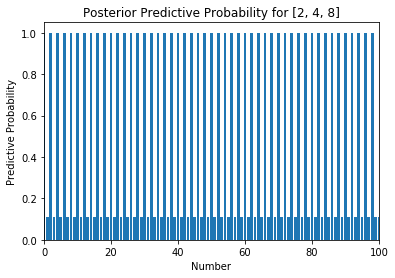

In [12]:
plt.title('Posterior Predictive Probability for [2, 4, 8]')
data = g
posterior(data)

Yes, it does meet my intuitions because 2, 4, and 8 are even numbers and contains a square number, and the graph shows accordingly. And when all the components are present, the output is 1.

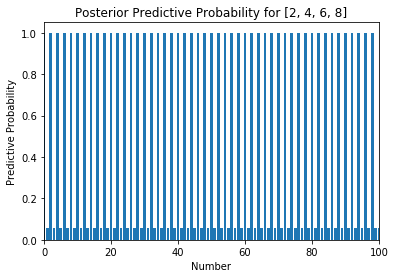

In [13]:
plt.title('Posterior Predictive Probability for [2, 4, 6, 8]')
data = h
posterior(data)

Yes, it does meet my intuitions because 2, 4, 8, and 10 are even numbers, contains a square number, and contains a multiple of 10, and the graph shows accordingly. And when all the components are present, the output is 1. There are more outputs of 1 than the [2, 4, 8] graph because 10 adds an extra characteristic.

In [24]:
#Question 3

ranged = []
combined = [] 
        
for i in range(1, 100):
    start = i
    current = i
    maxi = 100
    while current <= maxi:
        ranged.append(list(range(start,current+1)))
        current += 1
ranged.append([100])

for each in all_datasets:
    combined.append(each)
for every in ranged:
    combined.append(every)

def ranges(dataset):
    x, y = [], []
    priors = []
    for h in combined:
        if h in all_datasets:
            priors.append(likelihood(dataset, h)*(1/8))
        else:
            priors.append(likelihood(dataset, h)*(1/5050))
    for i in range(100):
        x.append(i)
        z = []
        for j in range(len(combined)):
            if i in combined[j]:
                value = 1
            else:
                value = 0
            pp = priors[j]/sum(priors)
            z.append(value * pp)
        y.append(sum(z))
    
    plt.xlabel('Number')
    plt.ylabel('Predictive Probability')
    plt.bar(x,y)
    plt.show()

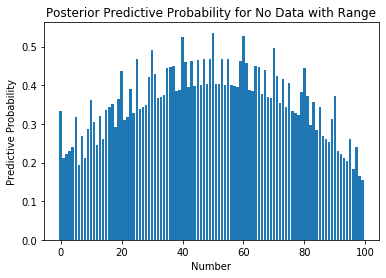

In [25]:
plt.title('Posterior Predictive Probability for No Data with Range')
data = a
ranges(data)

No, it does not meet my intuitions even though there is range because again, I would imagine no data to be an empty graph.

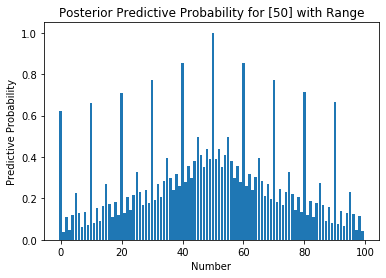

In [27]:
plt.title('Posterior Predictive Probability for [50] with Range')
data = b
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 50 which takes into account the range.

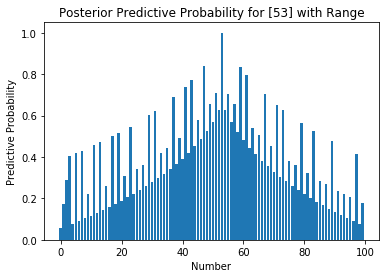

In [28]:
plt.title('Posterior Predictive Probability for [53] with Range')
data = c
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 53 which takes into account the range.

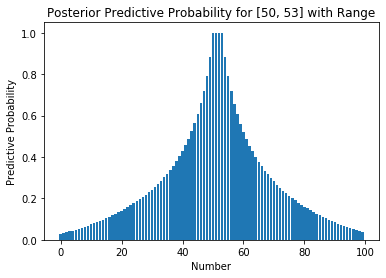

In [29]:
plt.title('Posterior Predictive Probability for [50, 53] with Range')
data = d
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 50, 53 which takes into account the range.

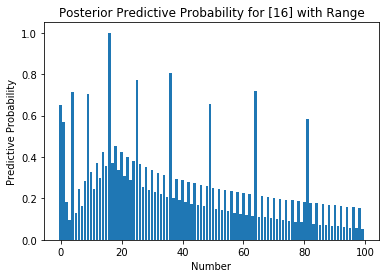

In [30]:
plt.title('Posterior Predictive Probability for [16] with Range')
data = e
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 16 which takes into account the range.

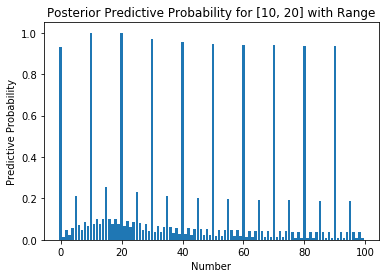

In [31]:
plt.title('Posterior Predictive Probability for [10, 20] with Range')
data = f
ranges(data)

No, it does not meet my intuition even though there is range, because it does not reap a consistent output of 1 when x is 10 to 20.

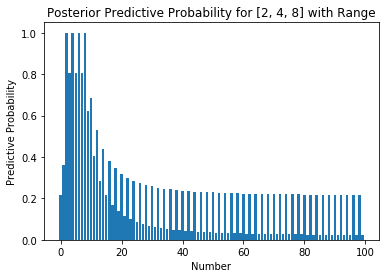

In [32]:
plt.title('Posterior Predictive Probability for [2, 4, 8] with Range')
data = g
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 2, 4, 8 which takes into account the range.

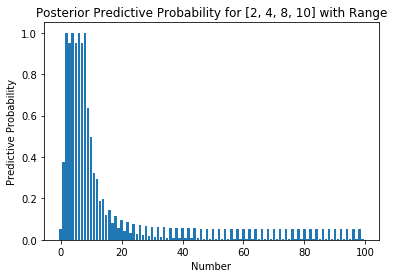

In [26]:
plt.title('Posterior Predictive Probability for [2, 4, 8, 10] with Range')
data = h
ranges(data)

Yes, it does meet my intution because the output is 1 when x is 2, 4, 8, 10 which takes into account the range.